# Case Study: Neuro

## Import Packages

In [13]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
#srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Velocity Estimation for Sample Genes

In [46]:
%autoreload 2

raw_path="/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/DentateGyrus.csv"
raw_path='/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/DentateGyrus.csv'
#raw_path='/Users/chen.weiqing/code/celldancer/DentateGyrus.csv'
cell_type_u_s=pd.read_csv(raw_path)

In [49]:
%autoreload 2

#enu=1
# n_jobs_list=[40,35,30,25,20,15,10,5,1]
# n_jobs_list=[7,3]
#n_jobs_list=[15]

n_jobs_list=[40]


for enu,n_jobs in enumerate(n_jobs_list):
    enu=1
    time_start=datetime.datetime.now()

    max_epoches=200
    check_val_every_n_epoch=10
    patience=3
    permutation_ratio=0.1
    speed_up=True
    norm_u_s=False
    norm_cell_distribution=False

    # gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
    #            'Gnao1','Ncald','Klf7','Ank2',\
    #            'Evl','Cdh13','Ppfia2','Astn1',\
    #            'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
    #             'Tbc1d16','Slc1a3','Syt11']


    #gene_list=list(load_raw_data.gene_name.drop_duplicates())
    gene_list=None
    #result_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/neuro/velocity_result/tunning_train'
    #result_path=None

    folder_name=("epoch"+str(max_epoches)+
                 "check_n"+str(check_val_every_n_epoch)+
                 "Ratio"+str(permutation_ratio)+
                 "autoD"+str(speed_up)+
                 "autoN"+str(norm_u_s)+
                 "p"+str(patience)+
                 "bin"+str(norm_cell_distribution)+
                'job'+str(n_jobs))

    save_path = '/Users/wanglab/Documents/ShengyuLi/Velocity/data/neuro/velocity_result/test_speed/'+folder_name+'/'

    if not os.path.isdir(save_path):
        os.mkdir(save_path)

    # Velocity Estimation
    loss_df, cellDancer_df=velocity_estimation.velocity(cell_type_u_s,\
                                                     gene_list=gene_list,\
                                                     max_epoches=max_epoches,\
                                                     check_val_every_n_epoch=check_val_every_n_epoch,\
                                                     patience=patience,\
                                                     permutation_ratio=permutation_ratio,\
                                                     speed_up=speed_up,\
                                                     norm_u_s=norm_u_s,\
                                                     norm_cell_distribution=norm_cell_distribution,\
                                                     n_jobs=n_jobs,\
                                                     save_path=save_path)
    time_end=datetime.datetime.now()
    time_spent=(time_end-time_start).seconds/60
    time_report=pd.DataFrame({'n_jobs':n_jobs,
                              'time_start':time_start,
                              'time_end':time_end,
                              'time_spent(min)':time_spent,
                              'max_epoches':max_epoches,
                              'check_val_every_n_epoch':check_val_every_n_epoch,
                              'permutation_ratio':permutation_ratio,
                              'speed_up':speed_up,
                              'norm_u_s':norm_u_s,
                              'patience':patience,
                              'norm_cell_distribution':norm_cell_distribution,
                             }, index=[enu])
    # if enu==0:
    #     time_report.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/neuro/velocity_result/test_speed/test_speed.csv',index=False)
    # else:
    #     time_report.to_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/neuro/velocity_result/test_speed/test_speed.csv',index=False,mode='a',header=False)



Using /Users/wanglab/Documents/ShengyuLi/Velocity/data/neuro/velocity_result/test_speed/epoch200check_n10Ratio0.1autoDTrueautoNFalsep3binFalsejob40/cell_dancer_velocity_2022-05-27 18-24-50 as the output path.
Arranging genes for parallel job.
2159  genes were arranged to  54  portions.


Velocity Estimation: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 54/54 [28:49<00:00, 32.02s/it]


In [50]:
cellDancer_df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Stom,0.000000,0.006305,9.385150e-07,0.006294,0.000002,0.951817,0.003524,0.068943,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429
1,1,Stom,0.000000,0.006305,9.385150e-07,0.006294,0.000002,0.951817,0.003524,0.068943,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895
2,2,Stom,0.000000,0.008353,9.295276e-07,0.008339,0.000002,0.951943,0.003514,0.068943,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419
3,3,Stom,0.000000,0.000000,9.668082e-07,0.000000,0.000002,0.951425,0.003555,0.068943,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485
4,4,Stom,0.000000,0.000000,9.668082e-07,0.000000,0.000002,0.951425,0.003555,0.068943,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39164255,18135,Prmt8,0.131071,0.262922,1.410238e-01,0.266331,0.095084,0.573575,0.260010,0.109623,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668
39164256,18136,Prmt8,0.198949,0.531809,2.013258e-01,0.517340,0.117767,0.568054,0.266923,0.109623,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788
39164257,18137,Prmt8,0.173362,0.212177,1.804222e-01,0.234265,0.112805,0.569238,0.256904,0.109623,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364
39164258,18138,Prmt8,0.216978,0.338159,2.186953e-01,0.355581,0.126118,0.565421,0.259761,0.109623,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549


## Sample Genes' Velocity Plot

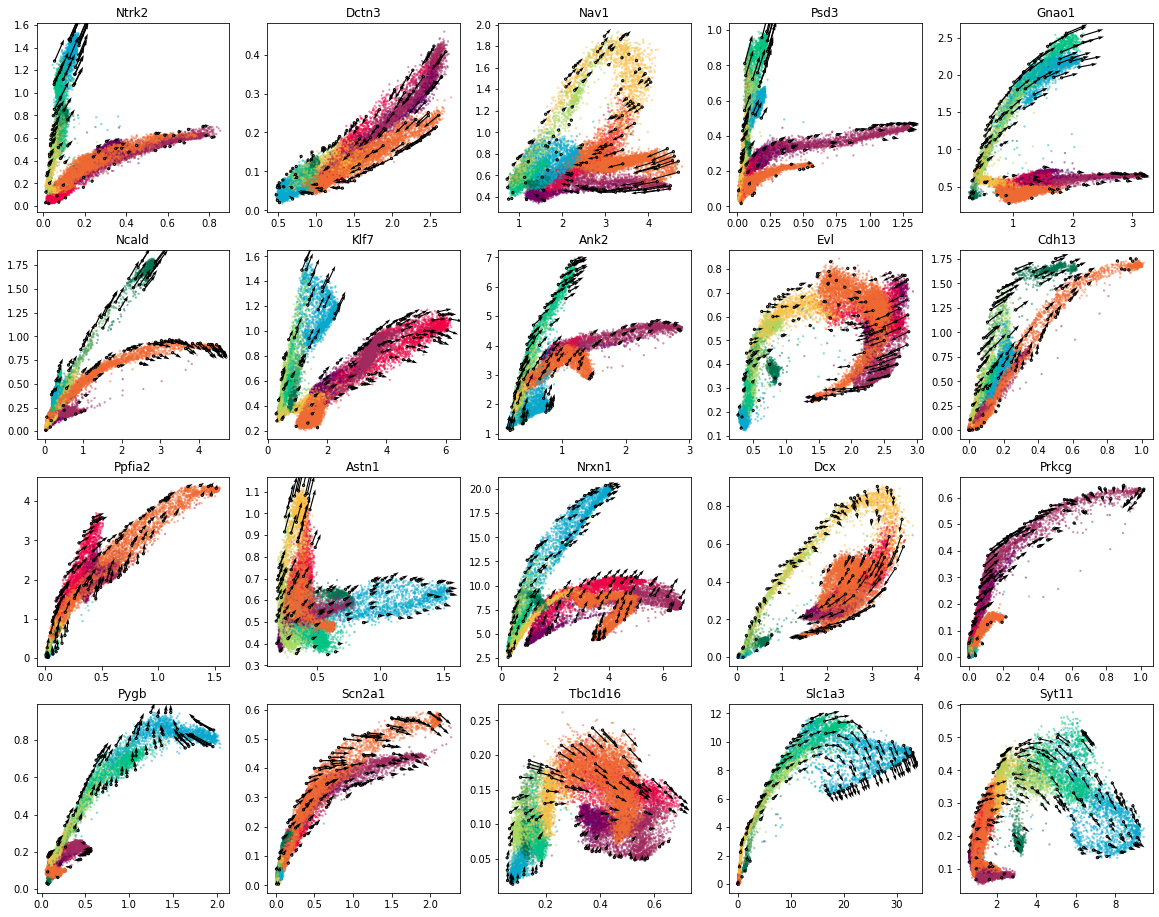

In [54]:
gene_list=['Ntrk2','Dctn3','Nav1','Psd3',\
           'Gnao1','Ncald','Klf7','Ank2',\
           'Evl','Cdh13','Ppfia2','Astn1',\
           'Nrxn1','Dcx','Prkcg','Pygb','Scn2a1',\
            'Tbc1d16','Slc1a3','Syt11']

ncols=5

height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))
# fig = plt.figure(figsize=(20,20))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])

plt.show()

(genes, cells): (2156, 18140)
After downsampling, there are  888 cells.


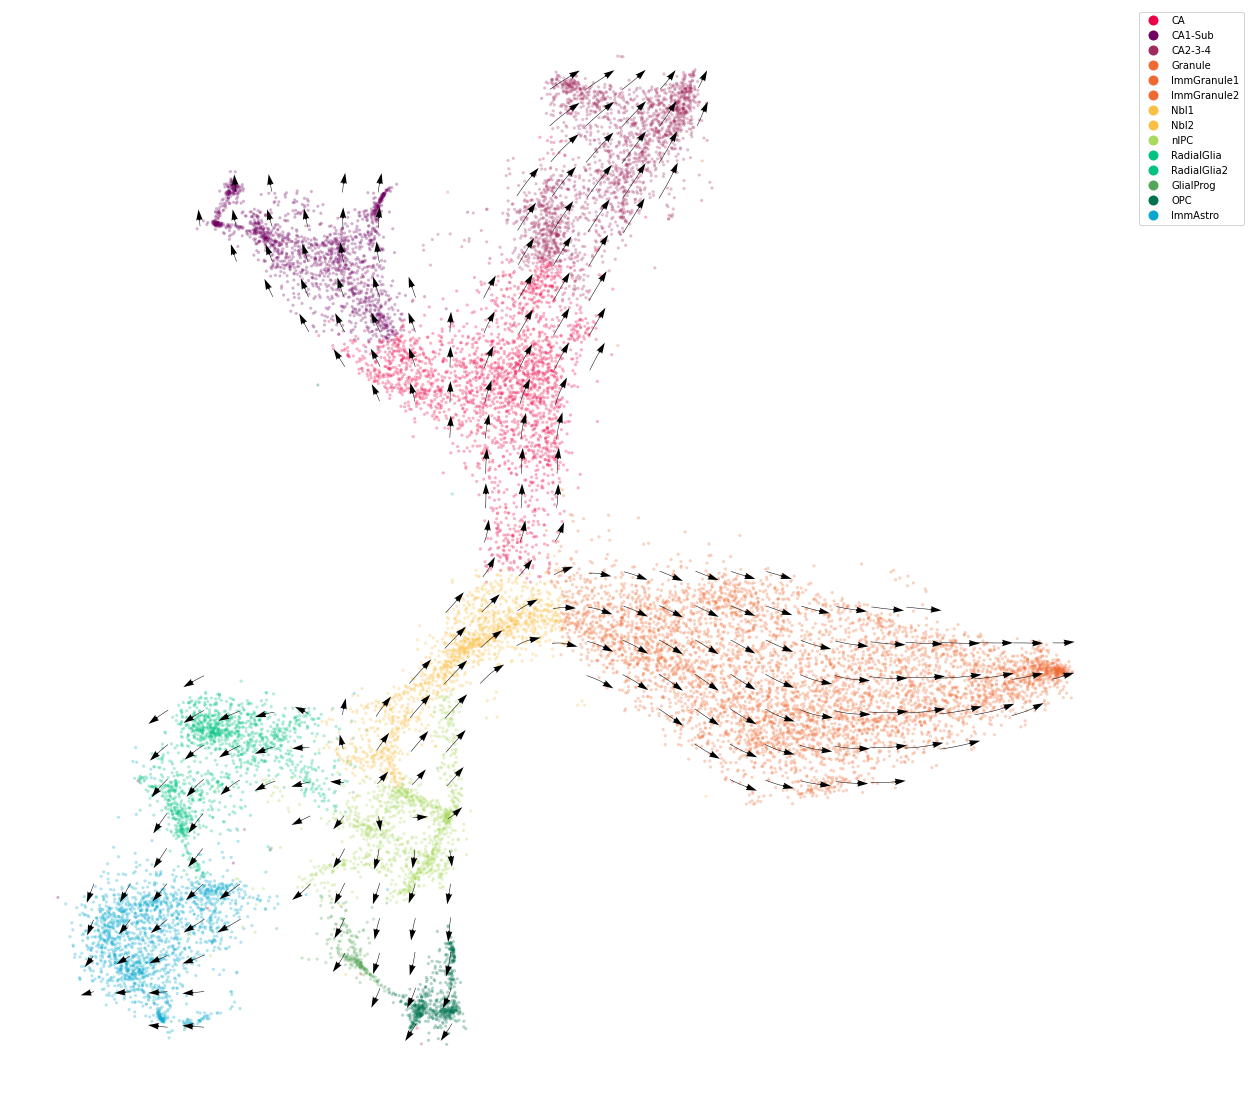

In [55]:
%autoreload 2

# Set Parameters
projection_neighbor_choice='embedding'
expression_scale=None
projection_neighbor_size=200
speed_up=(60,60)

# Compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# Plot cell velocity
# Set Parameters
min_mass=2
arrow_grid=(30,30)
alpha_inside=0.3


fig, ax = plt.subplots(figsize=(20,20))
im = cdplt.cell.scatter_cell(ax,cellDancer_df, colors=colormap.colormap_neuro, alpha=alpha_inside, s=10,
             velocity=True, legend='on',min_mass=min_mass,arrow_grid=arrow_grid)
ax.axis('off')
plt.show()

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8880/8880 [01:00<00:00, 146.16it/s]


use path_similarity:  0.25
There are 5 clusters.
[0 1 2 3 4]


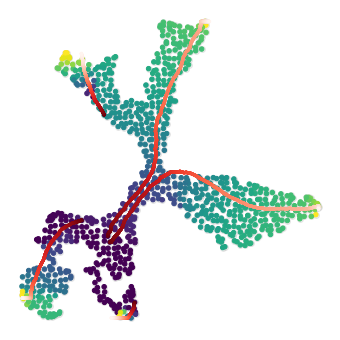




Cluster  0
Total cells in the cluster:  450
MAX allowed zero time cells:  22
MAX allowed terminal cells:  22
Only  1  terminal cells left.
[603]
72  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  72
MAX allowed zero time cells:  22
MAX allowed terminal cells:  22
Only  7  zero cells left. 
[80, 193, 204, 258, 403, 598, 682]
Only  3  terminal cells left.
[666, 748, 870]
number of paths:  2 2

Display reference paths for cluster 0


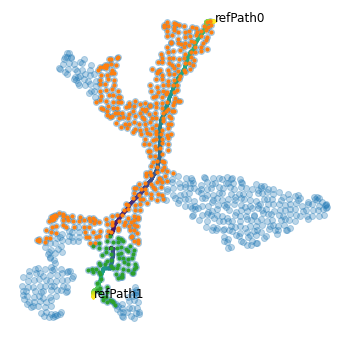


intercluster cell time adjustment
number of cells:  450
Cutoff is  0.05338801800641271
Number of nodes:  2
clusterIDs:  [0, 1]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (90, 102)
pair_cellIDs:  (425, 80)
pair_cellIDs:  (501, 16)
pair_cellIDs:  (343, 204)
pair_cellIDs:  (457, 658)
pair_cellIDs:  (151, 671)
pair_cellIDs:  (391, 709)
pair_cellIDs:  (237, 22)
pair_cellIDs:  (564, 682)
pair_cellIDs:  (643, 818)
pair_cellIDs:  (850, 451)
pair_cellIDs:  (839, 836)
pair_cellIDs:  (842, 802)
pair_cellIDs:  (414, 403)

Peak mode:  most_frequent_shift


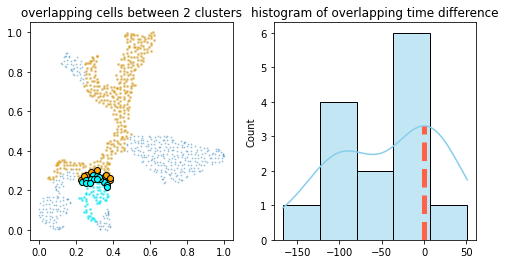

Time shift is:  1
The overlapping cells are: 
cell  425  from cluster  0  and  80  from cluster  1


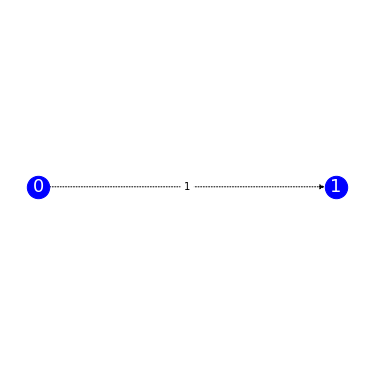

Connected components:  {0, 1}
All nodes adjustment:  {0: 0, 1: 1}



Cluster  1
Total cells in the cluster:  278
MAX allowed zero time cells:  13
MAX allowed terminal cells:  13
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[599]
number of paths:  1 1

Display reference paths for cluster 1


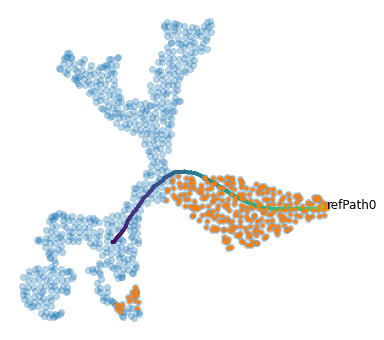




Cluster  2
Total cells in the cluster:  106
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[742]
number of paths:  1 1

Display reference paths for cluster 2


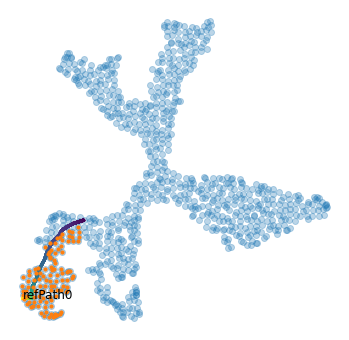




Cluster  3
Total cells in the cluster:  43
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  2  terminal cells left.
[230, 649]
number of paths:  1 1

Display reference paths for cluster 3


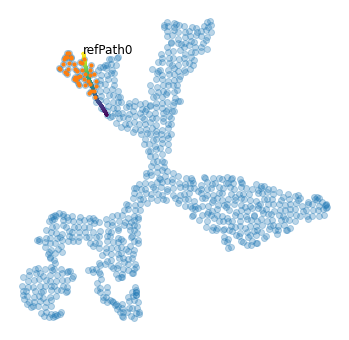




Cluster  4
Total cells in the cluster:  11
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[849]
number of paths:  1 1

Display reference paths for cluster 4


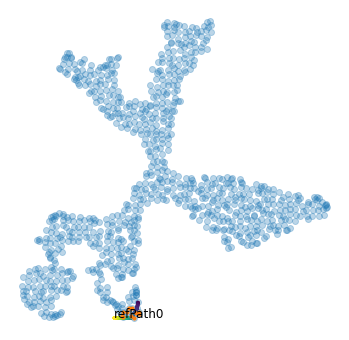




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  888
Cutoff is  0.058423757617624104
Number of nodes:  5
clusterIDs:  [0, 1, 2, 3, 4]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (666, 419)
pair_cellIDs:  (857, 540)
pair_cellIDs:  (140, 336)
pair_cellIDs:  (811, 197)
pair_cellIDs:  (716, 72)
pair_cellIDs:  (689, 213)
pair_cellIDs:  (119, 803)
pair_cellIDs:  (60, 668)
pair_cellIDs:  (417, 159)
pair_cellIDs:  (242, 799)
pair_cellIDs:  (310, 329)
pair_cellIDs:  (157, 199)
pair_cellIDs:  (535, 688)
pair_cellIDs:  (130, 187)
pair_cellIDs:  (870, 487)
pair_cellIDs:  (319, 789)

Peak mode:  most_frequent_shift


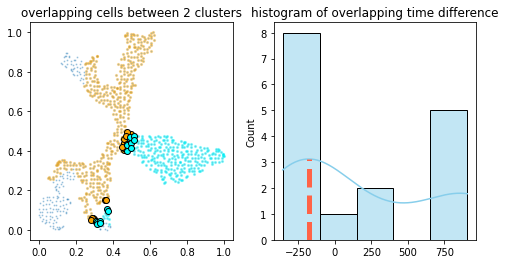

Time shift is:  -180
The overlapping cells are: 
cell  811  from cluster  0  and  197  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (272, 267)
pair_cellIDs:  (662, 288)
pair_cellIDs:  (416, 99)
pair_cellIDs:  (753, 148)
pair_cellIDs:  (203, 569)
pair_cellIDs:  (254, 125)
pair_cellIDs:  (261, 807)
pair_cellIDs:  (868, 856)
pair_cellIDs:  (438, 266)
pair_cellIDs:  (683, 307)
pair_cellIDs:  (884, 132)
pair_cellIDs:  (260, 781)
pair_cellIDs:  (572, 248)
pair_cellIDs:  (118, 13)
pair_cellIDs:  (744, 280)
pair_cellIDs:  (648, 23)
pair_cellIDs:  (734, 325)
pair_cellIDs:  (557, 345)
pair_cellIDs:  (564, 131)

Peak mode:  most_frequent_shift


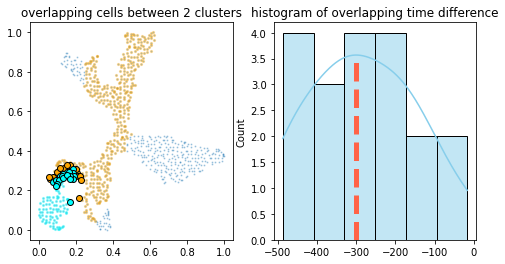

Time shift is:  -308
The overlapping cells are: 
cell  564  from cluster  0  and  131  from cluster  2

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (235, 366)
pair_cellIDs:  (295, 139)
pair_cellIDs:  (362, 225)
pair_cellIDs:  (223, 77)
pair_cellIDs:  (160, 296)
pair_cellIDs:  (381, 38)
pair_cellIDs:  (127, 252)
pair_cellIDs:  (354, 196)
pair_cellIDs:  (341, 427)
pair_cellIDs:  (19, 285)
pair_cellIDs:  (384, 184)

Peak mode:  most_frequent_shift


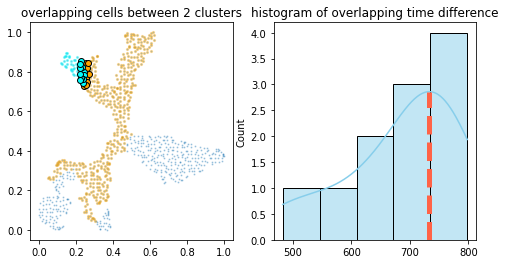

Time shift is:  730
The overlapping cells are: 
cell  341  from cluster  0  and  427  from cluster  3

Consolidating time between clusters  0  and  4 ...
pair_cellIDs:  (666, 657)
pair_cellIDs:  (119, 257)

Peak mode:  least_shift


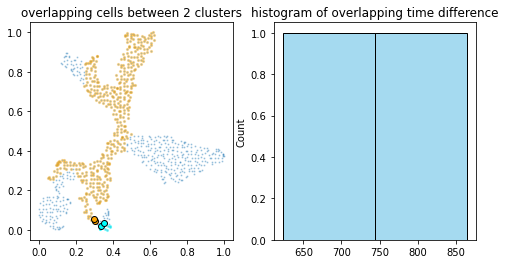

Time shift is:  623
The overlapping cells are: 
cell  666  from cluster  0  and  657  from cluster  4

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  1  and  4 ...
pair_cellIDs:  (790, 657)
pair_cellIDs:  (189, 609)
pair_cellIDs:  (487, 463)
pair_cellIDs:  (329, 257)
pair_cellIDs:  (222, 718)
pair_cellIDs:  (668, 849)
pair_cellIDs:  (227, 611)
pair_cellIDs:  (803, 664)
pair_cellIDs:  (717, 732)

Peak mode:  most_frequent_shift


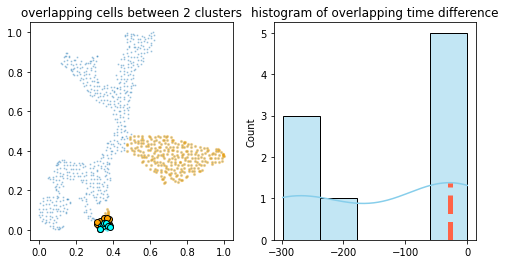

Time shift is:  0
The overlapping cells are: 
cell  329  from cluster  1  and  257  from cluster  4

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)

Consolidating time between clusters  2  and  4 ...
No close cells between clusters	 (2, 4)

Consolidating time between clusters  3  and  4 ...
No close cells between clusters	 (3, 4)


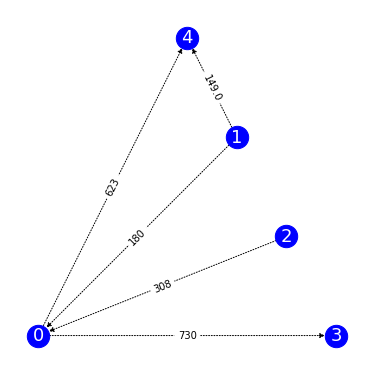

Connected components:  {0, 1, 2, 3, 4}
There are cycle(s), forcing a break.
All nodes adjustment:  {0: -20075, 1: -19452, 2: 0, 3: 0, 4: -19452}


All inter cluster cell time has been resolved.



There are 18140 cells.


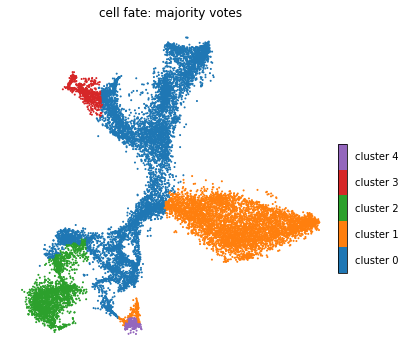

--- 148.49381923675537 seconds ---
   
 


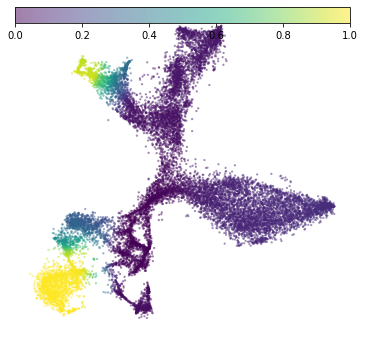

In [58]:
%autoreload 2

dt = 0.001
t_total = {0.001: 10000}
n_repeats = 10

speed_up=(60,60)
grid = (30, 30)
load_cellDancer = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 5,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

## Plot Pseudotime
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, 
             velocity=False)
ax.axis('off')
plt.show()